<center> <span style="color:#0F3460;font-size:30px; font-weight: bold; padding:250px ;">Elevator Predictive Maintenance</span> </center>

<span> <center>Datasets:https://www.kaggle.com/datasets/shivamb/elevator-predictive-maintenance-dataset </center></span>

<center><span style="color:#0F3460;font-size:21px; font-weight: bold;">


<span style="color:#0F3460;font-size:21px; font-weight: bold;">1.1 Importing libaries </span>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

<hr>

  <center><span style="color:#0F3460;font-size:30px; font-weight: bold;">Part 1</span> </center> <br>
  
  <center><span style="color:#0F3460;font-size:23px; font-weight: bold;">Data Preprocessing</span>  </center>

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.2 Importing My Data From *csv* File</span>

In [5]:
epm = pd.read_csv("predictive-maintenance-dataset.csv")

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.3 Top 5 Rows</span>

In [6]:
epm.head()

,ID,revolutions,humidity,vibration
0,1,93.744,73.999,18.0
1,1,93.740,73.999,18.0
2,1,93.736,73.998,18.0
3,1,93.732,73.998,18.0
4,1,93.729,73.998,18.0


- ID: Used for tracking and managing records.
- Revolutions: Key feature for assessing wear and predicting when maintenance is needed based on usage.
- Humidity: Helps in understanding environmental factors affecting machinery performance.
- Vibration: Critical for early detection of mechanical issues, allowing for preventive actions.
- x1 to x5: Enhance the model by providing additional context and potentially capturing complex interactions affecting machinery health.



 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.4 Info</span>

In [7]:
epm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112001 entries, 0 to 112000
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           112001 non-null  int64  
 1   revolutions  112001 non-null  float64
 2   humidity     112001 non-null  float64
 3   vibration    109563 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.4 MB


 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.5 Cleaning</span>

In [8]:
epm_clean = epm.isnull().sum()
epm_clean

ID                0
revolutions       0
humidity          0
vibration      2438
dtype: int64

In [9]:
epm_clean = epm.dropna()
epm_clean.isnull().sum()

ID             0
revolutions    0
humidity       0
vibration      0
dtype: int64

<hr>

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.6 Statistical Summary </span>


In [10]:
epm_clean.describe()

,ID,revolutions,humidity,vibration
count,109563.000000,109563.000000,109563.000000,109563.000000
mean,934.745169,46.250013,74.216124,28.340276
std,541.556004,19.130226,0.686551,24.292500
min,1.000000,16.933000,72.399000,2.000000
25%,468.000000,28.818000,73.908000,8.000000
50%,936.000000,43.295000,74.207000,21.280000
75%,1407.000000,64.000000,74.717000,39.210000
max,1867.000000,93.744000,75.400000,100.000000


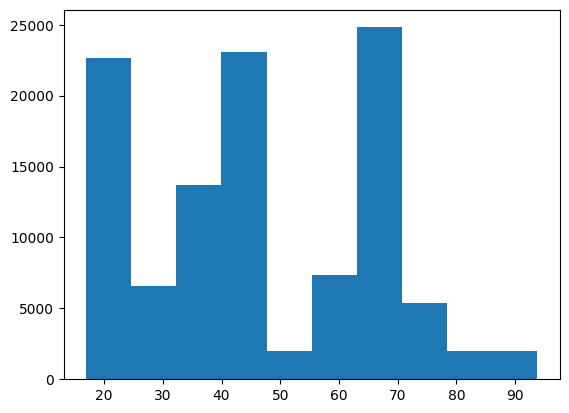

In [11]:
revolutions = epm_clean['revolutions']
plt.hist(revolutions)
plt.show()

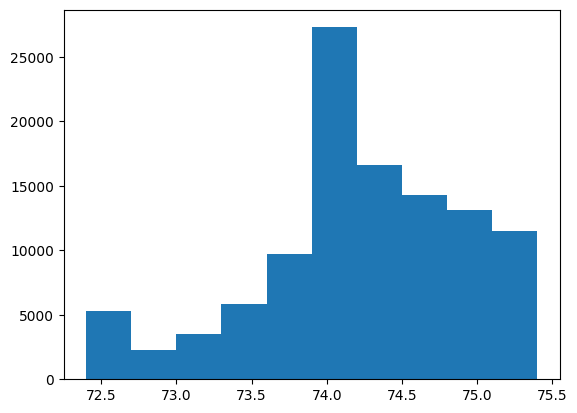

In [12]:
humidity = epm_clean['humidity']
plt.hist(humidity)
plt.show()

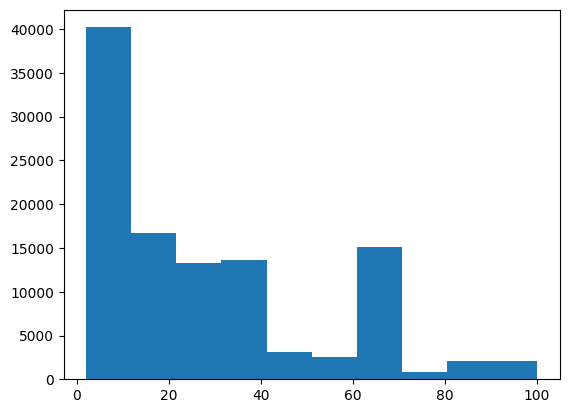

In [13]:
vibration = epm_clean['vibration']
plt.hist(vibration)
plt.show()

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.7 Relationships between Features</span>


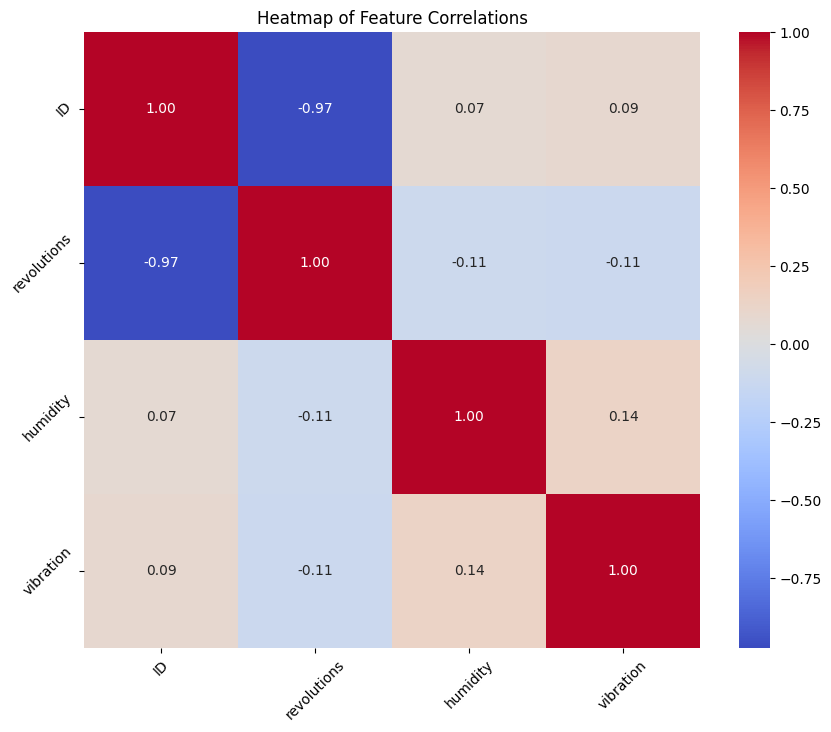

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# emp = pd.read_csv('path_to_your_dataset.csv')

# Calculate the correlation matrix
corr = epm_clean.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjusts the size of the plot
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Customizing the plot
plt.title('Heatmap of Feature Correlations')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.yticks(rotation=45)  # Rotates the y-axis labels for better readability

# Display the plot
plt.show()

X5 and humidity 
X4, x3, x2, x1 and revolution 

Non of the sensors work good with vibration

In [15]:
import pandas as pd

# Read the training data
train_df = pd.read_csv('predictive-maintenance-dataset.csv', delimiter=',', header=0)

# Print the shape and first few rows
print('Shape of Train dataset: ', train_df.shape)
print(train_df.head())


Shape of Train dataset:  (112001, 4)
   ID  revolutions  humidity  vibration
0   1       93.744    73.999       18.0
1   1       93.740    73.999       18.0
2   1       93.736    73.998       18.0
3   1       93.732    73.998       18.0
4   1       93.729    73.998       18.0


In [16]:
print(train_df.columns)  # Print column indices

Index(['ID', 'revolutions', 'humidity', 'vibration'], dtype='object')


In [17]:
print(train_df.head())

   ID  revolutions  humidity  vibration
0   1       93.744    73.999       18.0
1   1       93.740    73.999       18.0
2   1       93.736    73.998       18.0
3   1       93.732    73.998       18.0
4   1       93.729    73.998       18.0


In [18]:
import pandas as pd


# Step 3: Print the shape of the DataFrame to understand its dimensions
print('Initial shape of Train dataset: ', train_df.shape)

# Step 4: Check the actual number of columns
num_columns = train_df.shape[1]
print(f"Number of columns: {num_columns}")

# Step 5: Define column names (ensure the count matches the number of columns)
col_names = ['ID', 'revolutions', 'humidity', 'vibration']

# Ensure the number of column names matches the number of columns in the DataFrame
if len(col_names) == num_columns:
    # Assign column names
    train_df.columns = col_names
else:
    print("Error: The number of column names does not match the number of columns in the DataFrame")
    print(f"Expected {num_columns} column names but got {len(col_names)}.")

# Print the columns to verify
print("Columns of the DataFrame:", train_df.columns)

# Print the shape and head of the Data


Initial shape of Train dataset:  (112001, 4)
Number of columns: 4
Columns of the DataFrame: Index(['ID', 'revolutions', 'humidity', 'vibration'], dtype='object')


In [19]:
# Read the test data
test_df = pd.read_csv("predictive-maintenance-dataset.csv")

# Inspect the test DataFrame
print(test_df.shape) 
print(test_df.head()) 
print(test_df.columns)  


(112001, 4)
   ID  revolutions  humidity  vibration
0   1       93.744    73.999       18.0
1   1       93.740    73.999       18.0
2   1       93.736    73.998       18.0
3   1       93.732    73.998       18.0
4   1       93.729    73.998       18.0
Index(['ID', 'revolutions', 'humidity', 'vibration'], dtype='object')


In [20]:
import pandas as pd

# Step 1: Read the CSV file with the correct delimiter (comma in this case)
truth_df = pd.read_csv('predictive-maintenance-dataset.csv', delimiter=',', header=0)
truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)
print(truth_df.head())


   ID  humidity  vibration
0   1    73.999       18.0
1   1    73.999       18.0
2   1    73.998       18.0
3   1    73.998       18.0
4   1    73.998       18.0


In [21]:
train_df.sort_values

<bound method DataFrame.sort_values of           ID  revolutions  humidity  vibration
0          1       93.744    73.999      18.00
1          1       93.740    73.999      18.00
2          1       93.736    73.998      18.00
3          1       93.732    73.998      18.00
4          1       93.729    73.998      18.00
...      ...          ...       ...        ...
111996  1867       20.186    73.992       2.00
111997  1867       20.186    73.992      20.01
111998  1867       20.185    73.992      20.01
111999  1867       20.185    73.992      20.00
112000  1867       20.184    73.992       2.00

[112001 rows x 4 columns]>

In [22]:
# sort based on id and cycle
train_df = train_df.sort_values(['ID','revolutions'])
train_df.head()

,ID,revolutions,humidity,vibration
58,1,93.520,73.980,18.06
57,1,93.524,73.980,18.06
56,1,93.528,73.981,18.06
55,1,93.532,73.981,18.06
54,1,93.536,73.981,18.05


In [23]:
model_path = 'my_model.h5'

<span style="color:#0F3460;font-size:19px; font-weight: bold;">Data Preprocessing </span>

In [26]:
from sklearn import preprocessing
# TRAIN
#######
# Data Labeling - generate column RUL(Remaining Usefull Life or Time to Failure)
rul = pd.DataFrame(train_df.groupby('ID')['vibration'].max()).reset_index()
rul.columns = ['ID', 'max']
train_df = train_df.merge(rul, on=['ID'], how='left')
train_df['RUL'] = train_df['max'] - train_df['vibration']
train_df.drop('max', axis=1, inplace=True)
# generate label columns for training data
# we will only make use of "label1" for binary classification,
# while trying to answer the question: is a specific engine going to fail within w1 revolutionss?
w1 = 30
w0 = 15
train_df['label1'] = np.where(train_df['RUL'] <= w1, 1, 0 )
train_df['label2'] = train_df['label1']
train_df.loc[train_df['RUL'] <= w0, 'label2'] = 2

# MinMax normalization (from 0 to 1)
train_df['vibration_norm'] = train_df['vibration']
# Define columns to normalize, excluding 'ID', 'RUL', 'label1', 'label2'
cols_normalize = train_df.columns.difference(['ID','vibration','RUL','label1','label2'])
min_max_scaler = preprocessing.MinMaxScaler()
# Fill NaNs
train_df = train_df.fillna(0)

norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]),
                             columns=cols_normalize,
                             index=train_df.index)
join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)


# TEST
######
# MinMax normalization (from 0 to 1)
test_df['vibration_norm'] = test_df['vibration']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]),
                            columns=cols_normalize,
                            index=test_df.index)
test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)
test_df.head()

# Generate column max for test data
rul = pd.DataFrame(test_df.groupby('ID')['vibration'].max()).reset_index()
rul.columns = ['ID', 'max']

# Merge 'rul' with 'test_df'
test_df = test_df.merge(rul, on='ID', how='left')

# Calculate the RUL
test_df['RUL'] = test_df['max'] - test_df['vibration']
test_df.drop('max', axis=1, inplace=True)

# Generate label columns w0 and w1 for test data
test_df['label1'] = np.where(test_df['RUL'] <= w1, 1, 0)
test_df['label2'] = test_df['label1']
test_df.loc[test_df['RUL'] <= w0, 'label2'] = 2

# Reset index if needed
test_df = test_df.reset_index(drop=True)

# Fill NaNs
test_df = test_df.fillna(0)

# Print the first few rows of the updated test_df
print(test_df.head())

   ID  revolutions  humidity  vibration  vibration_norm   RUL  label1  label2
0   1     1.000000  0.533156       18.0            0.18  0.06       1       2
1   1     0.999948  0.533156       18.0            0.18  0.06       1       2
2   1     0.999896  0.532822       18.0            0.18  0.06       1       2
3   1     0.999844  0.532822       18.0            0.18  0.06       1       2
4   1     0.999805  0.532822       18.0            0.18  0.06       1       2


 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.10 Function to reshape dataset as required by LSTM</span>

In [27]:
# function to reshape features into (samples, time steps, features)
def gen_sequence(id_df, seq_length, seq_cols):
    # for one id I put all the rows in a single matrix
    data_matrix = id_df[seq_cols].values
    num_elements = data_matrix.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]

In [28]:
# Define sequence length and columns to use
feature_columns = ['revolutions', 'humidity', 'vibration']
sequence_length = 50

# Filter IDs with enough data
valid_ids = [id for id in train_df['ID'].unique() if len(train_df[train_df['ID'] == id]) >= sequence_length]

# Generator for the sequences
seq_gen = (gen_sequence(train_df[train_df['ID'] == id], sequence_length, feature_columns) for id in valid_ids)

# Generate sequences and convert to numpy array
all_sequences = []
for sequences in seq_gen:
    all_sequences.extend(sequences)

seq_array = np.array(all_sequences, dtype=np.float32)
seq_array.shape

(18659, 50, 3)

In [29]:
# function to generate labels
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [30]:
# generate labels
label_gen = [gen_labels(train_df[train_df['ID']==id], sequence_length, ['label1'])
             for id in train_df['ID'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(18659, 1)

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Feature weights
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]


model = Sequential()  # Define the model
# First LSTM layer
model.add(LSTM(units=64, input_shape=(sequence_length, nb_features), 
    return_sequences=True,
    kernel_regularizer=regularizers.l2(0.01)
))

model.add(Dropout(0.3))

# Second LSTM layer
model.add(LSTM(
    units=32,  # Adjust the number of units as needed
    return_sequences=False,
    kernel_regularizer=regularizers.l2(0.01) 
))
model.add(Dropout(0.3))


# Dense sigmoid layer
model.add(Dense(units=nb_out, activation='sigmoid'))

# With adam optimizer and a binary crossentropy loss. We will optimize for model accuracy.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Verify the architecture
print(model.summary())

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    seq_array, 
    label_array,
    epochs=10,
    batch_size=200,
    validation_split=0.1,
    verbose=1,
    callbacks=[early_stopping]
)


2024-07-24 21:55:28.815094: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 64)         │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 22s 181ms/step - accuracy: 0.7357 - loss: 1.2408 - val_accuracy: 0.7208 - val_loss: 0.7011
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.8275 - loss: 0.5547 - val_accuracy: 0.8917 - val_loss: 0.4231
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - accuracy: 0.8731 - loss: 0.3638 - val_accuracy: 0.9164 - val_loss: 0.3037
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 163ms/step - accuracy: 0.9000 - loss: 0.2938 - val_accuracy: 0.9094 - val_loss: 0.2671
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.9260 - loss: 0.2446 - val_accuracy: 0.8682 - val_loss: 0.3515
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 17s 200ms/step - accuracy: 0.9453 - loss: 0.2102 - val_accuracy: 0.9185 - val_loss: 0.2300
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - accuracy: 0.9570 - loss: 0.1755 - val_accuracy: 0.9057 - val_loss: 0.2161
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 190ms/step - accuracy: 0.9637 - loss: 0.1528 - val

<hr>

<span style="color:#0F3460;font-size:19px; font-weight: bold;">Results</span>

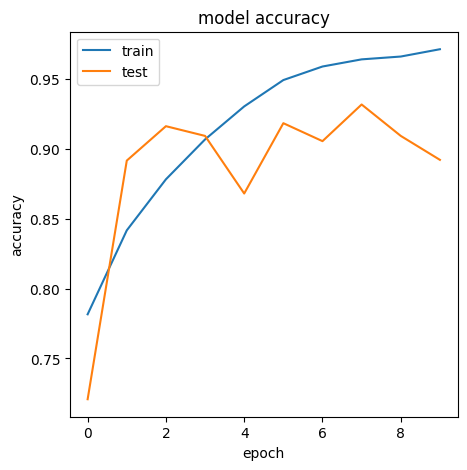

In [32]:
fig_acc = plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

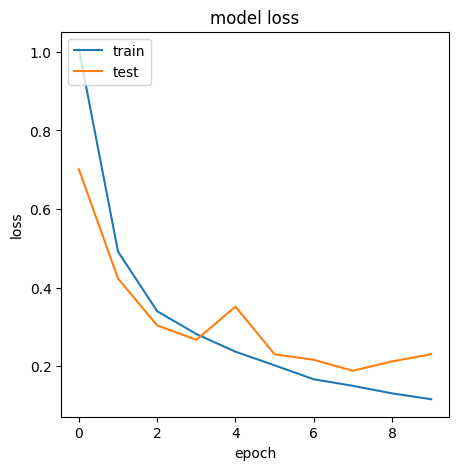

In [33]:
fig_acc = plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Model Evaluation on Validation set</span>

(1866, 50, 3)
(1866, 1)


59/59 - 2s - 34ms/step - accuracy: 0.8130 - loss: 1.7776
Accurracy: 0.812968909740448
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[   0  349]
 [   0 1517]]
Precision:  0.8129689174705252 
 Recall:  1.0 
 F1-score: 0.8968371268105232


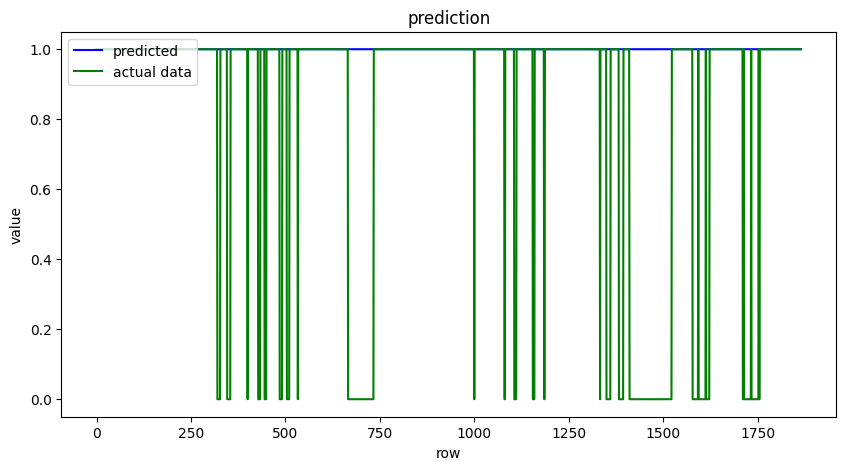

In [34]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import os
# We pick the last sequence for each ID in the test data

seq_array_test_last = [test_df[test_df['ID']==ID][feature_columns].values[-sequence_length:]
                       for ID in test_df['ID'].unique() if len(test_df[test_df['ID']==ID]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
# print("seq_array_test_last")
# print(seq_array_test_last)
print(seq_array_test_last.shape)

# Similarly, we pick the labels

#print("y_mask")
# serve per prendere solo le label delle sequenze che sono almeno lunghe 50
y_mask = [len(test_df[test_df['ID']==ID]) >= sequence_length for ID in test_df['ID'].unique()]
#print("y_mask")
#print(y_mask)
label_array_test_last = test_df.groupby('ID')['label1'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)
print(label_array_test_last.shape)
#print("label_array_test_last")
#print(label_array_test_last)

# Load the model
model_path = 'my_model.h5'
if os.path.isfile(model_path):
    estimator = load_model(model_path)
    # Recompile the model
    estimator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Ensure the shapes are compatible
assert seq_array_test_last.shape[0] == label_array_test_last.shape[0]

# test metrics
scores_test = estimator.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
print('Accurracy: {}'.format(scores_test[1]))

# make predictions and compute confusion matrix
y_pred_prob = estimator.predict(seq_array_test_last)
y_pred_test = (y_pred_prob > 0.5).astype("int32")
y_true_test = label_array_test_last.astype("int32")

# Check shapes and types
assert y_true_test.shape == y_pred_test.shape
test_set = pd.DataFrame(y_pred_test)
test_set.to_csv('binary_submit_test.csv', index = None)

print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true_test, y_pred_test)
print(cm)

# compute precision and recall
precision_test = precision_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print( 'Precision: ', precision_test, '\n', 'Recall: ', recall_test,'\n', 'F1-score:', f1_test )

# Plot in blue color the predicted data and in green color the
# actual data to verify visually the accuracy of the model.
fig_verify = plt.figure(figsize=(10, 5))
plt.plot(y_pred_test, color="blue")
plt.plot(y_true_test, color="green")
plt.title('prediction')
plt.ylabel('value')
plt.xlabel('row')
plt.legend(['predicted', 'actual data'], loc='upper left')
plt.show()
fig_verify.savefig("model_verify.png")

<center><span style="color:#0F3460;font-size:23px; font-weight: bold;">Regression</span>  </center></br>
 <center>How many more cycles an in-service engine will last before it fails?</center>

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential, load_model


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing

# Setting seed for reproducibility
np.random.seed(1234)
PYTHONHASHSEED = 0

# define path to save model
model_path = 'regression_model.keras'

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Data Preprocessing</span>


In [36]:
# generate labels
label_gen = [gen_labels(train_df[train_df['ID']==id], sequence_length, ['RUL'])
             for id in train_df['ID'].unique()]

label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(18659, 1)

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">LSTM</span>

In [37]:
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
from tensorflow.keras import backend as K


# Next, we build a deep network.
# The first layer is an LSTM layer with 100 units followed by another LSTM layer with 50 units.
# Dropout is also applied after each LSTM layer to control overfitting.
# Final layer is a Dense output layer with single unit and linear activation since this is a regression problem.
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

model = Sequential()
model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(
          units=50,
          return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=nb_out))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mae'])

print(model.summary())


# fit the network
history = model.fit(seq_array, label_array, epochs=100, batch_size=200, validation_split=0.05, verbose=2,
          callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )

# list all data in history
print(history.history.keys())
# Save the entire model to a file
model.save('regression_model.keras')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50, 100)        │        41,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,851 (280.67 KB)

 Trainable params: 71,851 (280.67 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
89/89 - 29s - 321ms/step - loss: 636.4702 - mae: 15.6342 - val_loss: 162.5407 - val_mae: 12.5707
Epoch 2/100
89/89 - 26s - 295ms/step - loss: 558.9186 - mae: 15.3248 - val_loss: 123.2131 - val_mae: 9.5520
Epoch 3/100
89/89 - 22s - 253ms/step - loss: 520.4691 - mae: 15.1734 - val_loss: 118.7268 - val_mae: 8.6934
Epoch 4/100
89/89 - 22s - 244ms/step - loss: 500.0296 - mae: 15.2146 - val_loss: 119.2431 - val_mae: 7.2202
Epoch 5/100
89/89 - 24s - 272ms/step - loss: 487.3981 - mae: 15.0644 - val_loss: 102.5574 - val_mae: 8.7102
Epoch 6/100
89/89 - 22s - 252ms/step - loss: 428.0204 - mae: 13.3667 - val_loss: 148.5352 - val_mae: 10.1248
Epoch 7/100
89/89 - 26s - 291ms/step - loss: 340.4152 - mae: 11.0192 - val_loss: 108.1099 - val_mae: 7.0552
Epoch 8/100
89/89 - 26s - 287ms/step - loss: 280.2101 - mae: 9.6279 - val_loss: 144.1294 - val_mae: 7.8762
Epoch 9/100
89/89 - 28s - 314ms/step - loss: 235.0592 - mae: 8.6584 - val_loss: 156.2850 - val_mae: 8.2071
Epoch 10/100
89/89 - 41

KeyboardInterrupt: 

<span style="color:#0F3460;font-size:19px; font-weight: bold;">Model Evaluation on Test set</span>


In [ ]:
# summarize history for MAE
fig_acc = plt.figure(figsize=(5, 5))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_mae.png")

# summarize history for Loss
fig_acc = plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_regression_loss.png")

# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('\nMAE: {}'.format(scores[1]))

y_pred = model.predict(seq_array,verbose=1, batch_size=200)
y_true = label_array

test_set = pd.DataFrame(y_pred)
test_set.to_csv('submit_train.csv', index = None)

<span style="color:#0F3460;font-size:19px; font-weight: bold;">Evaluate on Validation set</span>

In [ ]:
# We pick the last sequence for each id in the test data
seq_array_test_last = [test_df[test_df['ID']==id][feature_columns].values[-sequence_length:]
                       for id in test_df['ID'].unique() if len(test_df[test_df['ID']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)


y_mask = [len(test_df[test_df['ID']==id]) >= sequence_length for id in test_df['ID'].unique()]
label_array_test_last = test_df.groupby('ID')['RUL'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)

if os.path.isfile(model_path):
    estimator = load_model(model_path)
    
# Test metrics
scores_test = estimator.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
print('\nMAE: {}'.format(scores_test[1]))
# Make predictions
y_pred_test = model.predict(seq_array_test_last)
y_true_test = label_array_test_last
# Save predictions to CSV
test_set = pd.DataFrame(y_pred_test)
test_set.to_csv('submit_test.csv', index=None)
# Plot predictions vs. actual values
fig_verify = plt.figure(figsize=(10, 5))
plt.plot(y_pred_test, color="blue", label="Predicted")
plt.plot(y_true_test, color="green", label="Actual")
plt.title('Prediction vs Actual')
plt.ylabel('Value')
plt.xlabel('Row')
plt.legend(loc='upper left')
plt.show()
fig_verify.savefig("model_regression_verify.png")

  <center><span style="color:#0F3460;font-size:30px; font-weight: bold;">Part 4</span> </center> <br>
  
  <center><span style="color:#0F3460;font-size:23px; font-weight: bold;">Prediction</span>  </center>

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Prediction: Maintenance Needed</span>

In [ ]:
import pandas as pd

# Define thresholds for maintenance (example values, adjust based on your epm_clean)
revolutions_threshold = 1000
humidity_threshold = 75
vibration_threshold = 50

# Create the 'maintenance_needed' column based on the criteria
epm_clean['maintenance_needed'] = ((epm_clean['revolutions'] > revolutions_threshold) |
                              (epm_clean['humidity'] > humidity_threshold) |
                              (epm_clean['vibration'] > vibration_threshold)).astype(int)

# Check the new column
print(epm_clean[['revolutions', 'humidity', 'vibration', 'maintenance_needed']].head())

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Prediction: Model Accuracy</span>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Features and target variable
X = epm_clean[['revolutions', 'humidity', 'vibration']]
y = epm_clean['maintenance_needed']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Prediction: Maintenance Needed EX Time - Training Model</span>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Example synthetic data for demonstration
np.random.seed(42)

# Load your dataset
# Generate synthetic maintenance dates (e.g., maintenance every 30 days)
start_date = datetime(2024, 7, 23)  # Example start date
epm_clean['maintenance_date'] = [start_date + timedelta(days=np.random.randint(1, 365)) for _ in range(len(epm_clean))]

# Convert maintenance_date to datetime format
epm_clean['maintenance_date'] = pd.to_datetime(epm_clean['maintenance_date'])

# Calculate days until maintenance based on a reference date
reference_date = epm_clean['maintenance_date'].min()
epm_clean['days_until_maintenance'] = (epm_clean['maintenance_date'] - reference_date).dt.days

# Drop the maintenance_date column if no longer needed
epm_clean.drop(columns=['maintenance_date'], inplace=True)

# Prepare your features and target variable
X = epm_clean[['revolutions', 'humidity', 'vibration']]
y = epm_clean['days_until_maintenance']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Convert predicted days back to dates
predicted_dates = [reference_date + timedelta(days=int(day)) for day in y_pred]
print(predicted_dates[:5])  # Print first 5 predicted dates



 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Prediction: Maintenance Needed EX Time - Actual, Predicted Days Until Maintenance, Predicted Maintenance Date </span>

In [ ]:
# If you have actual maintenance dates for comparison
# actual_dates = [reference_date + timedelta(days=int(day)) for day in y_test]

# Display a sample of actual vs. predicted dates
predicted_dates = [reference_date + timedelta(days=int(day)) for day in y_pred]

# Create a DataFrame to compare actual and predicted dates
results_df = pd.DataFrame({
    'Actual Days Until Maintenance': y_test.values,
    'Predicted Days Until Maintenance': y_pred,
    'Predicted Maintenance Date': predicted_dates
})

# Display the first few rows of the results
print(results_df.head())

In [ ]:
epm_clean['revolutions_smooth'] = epm_clean['revolutions'].rolling(window=2).mean()
epm_clean['humidity_smooth'] = epm_clean['humidity'].rolling(window=2).mean()
epm_clean['vibration_smooth'] = epm_clean['vibration'].rolling(window=2).mean()

print(epm_clean)

In [ ]:

# Add the predicted maintenance dates to the original DataFrame
predicted_dates = [reference_date + timedelta(days=int(day)) for day in y_pred]

# Add predictions to the DataFrame
results_df = pd.DataFrame({
    'ID': epm_clean.loc[X_test.index, 'ID'],
    'Revolutions': X_test['revolutions'].values,
    'Humidity': X_test['humidity'].values,
    'Vibration': X_test['vibration'].values,
    'Predicted Days Until Maintenance': y_pred,
    'Predicted Maintenance Date': predicted_dates
})

# Display the first few rows of the results
print(results_df.head())